# CSCI 3343 Lab 2: Calculus for Function Optimization

**Posted:** Wednesday, September 8, 2021

**Due:** Friday, September 18, 2021

__Total Points__: 0.5 (extra pts for the final grade)

__Name__:
[Your first name] [Your last name], [Your BC username]

(e.g. Donglai Wei, weidf)

__Submission__: please rename the .ipynb file as __\<your_username\>_lab2.ipynb__ before you submit it to canvas. Example: weidf_lab2.ipynb.

# Introduction

## Motivation

Deep learning models have greatly advanced real-world computer vision applications, which is the focus of study (Week 7-12) in our course. 
In Lab 1 slides, we show how **linear algebra** has been used to <font color='red'>define</font> a deep learning neural network model, e.g., Multilayer Perceptron (MLP). 
- An one-layer MLP can be defined as $\sigma(W\mathbf{x}+\mathbf{b})$ (mentioned in Pset 1)
- A K-layer MLP can be written as $\mbox{MLP}(\mathbf{x}) = \sigma(W^{k-1}(\dots (W^{1}\sigma(W^{0}\mathbf{x}+\mathbf{b}^{0})+\mathbf{b}^{1})\dots)+\mathbf{b}^{k-1})$, where $(W^i,\mathbf{b}^i)$ are parameters for the $i$-th layer of the model.

For a given computer vision task, we need to <font color='red'>optimize</font> this highly nonlinear function to fit the training data, which will be taught in detail in Week 4-6. Below, we will introduce the formulation of the optimization problem and review **calculus** to understand the widely used optimization method, **gradient descend**.

## Optimization 101 [[Source]](https://web.stanford.edu/group/sisl/k12/optimization/MO-unit1-pdfs/1.1optimization.pdf)
**“Optimization”** comes from the same root as “optimal”, which means best. When you optimize something, you are “making it best”.

There are three components in an optimization problem:
- **Variables** $(x_0,\dots,x_{n-1})$: the inputs that you can control, which can have continous values (e.g., real numbers $\mathbb{R}$) or discrete values (e.g., integer numbers $\mathbb{Z}$).
- **Objective Function** $f(x)$: the output you’re trying to maximize or minimize.
- **Constraints**: equations that place limits on how big or small some variables can get. Equality constraints are usually noted $h_n(x)$ and inequality constraints are noted $g_n(x)$.


For our deep learning models in the supervised learning setting, we are given training data $\{(X_i, Y_i)\}$. For the image recognition task, $X_i$ is the input image and $Y_i$ is its object category label. The optimization problem for the MLP model is the following: 
- **Variables**: we need to find the best parameters $\{(W^i, \mathbf{b}^i)\}$  for all layers.
- **Objective Function**: We want the model prediction $\hat{Y}_i=\mbox{MLP}(X_i)$ to be close to the correct label $Y_i$ for each input image $X_i$. One objective function can be the mean squared error (MSE) between $\hat{Y}_i$ and $Y_i$. For example, the goal is to minimize the objective function (aka. loss function) $\sum_{i}(\mbox{MLP}(X_i) - Y_i)^2$
- **Constraints**: No constraints. $(W^i, \mathbf{b}^i)$ can be any real numbers.


## Learning Goals

- Part 1. Gradient (Multivariate Calculus)
- Part 2. Gradient Descend Method for Optimizing One Function
- Part 3. Gradient Descend Method for Optimizing The Sum of Functions (Machine Learning)

# Part 1. Gradient 101
Below is a step-by-step review of main concepts in multivariate calculus for differentiation.

## 1.1 Derivative $\rightarrow$ Partial Derivative

- Let's start from the definition of derivative for univariate function, which captures the rate of change of the function:
$\dfrac{d}{dx}f(x)=\lim_{h\rightarrow 0}\dfrac{f(x+h)-f(x)}{h}$

- For the multivariate case $\mathbf{x}=(x_0,\dots,x_{n-1}$), we can change the variable one-by-one, i.e., change $x_i$ by $h_i$. 
Thus, for each variable $x_i$, we can define parital derivative for each variable that captures the change of rate along each variable:
$\dfrac{\partial}{\partial x_i}f(x_0,\dots,x_{n-1})=\lim_{h_i\rightarrow 0}\dfrac{f(x_0,\dots,x_i+h_i,\dots x_{n-1})-f(\mathbf{x})}{h_i}$

### Exercise 1.1 Compute partial deriviative
$f(x,y) = x^2 +3y^2$. Please fill the analytical form (i.e., mathematical derivation) for the partial derivatives:

(a) $\dfrac{\partial f}{\partial x}$ = ???

(b) $\dfrac{\partial f}{\partial y}$ = ???

(c) Complete the code to compute the numerical form (i.e., implement the mathematical definition with a small $h$) and analytical form of $\dfrac{\partial f}{\partial y}$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def f_xy(x,y):
  return x**2 + 3*y**2

#### TODO: implement the partial derivative numerically
def partialF_partialY(x, y, h=1e-10):
  return ???  

#### TODO: implement the partial derivative analytically
def partialF_partialY_Analytic(x, y):
  return ???

## Test Case
xx = 0
yy = np.linspace(-2, 2, 30)

plt.plot(yy, partialF_partialY_Analytic(xx, yy), 'bo')
colors = 'gbr'
for cid, hh in enumerate([1, 5e-1, 1e-2]):
  plt.plot(yy, partialF_partialY(xx, yy, hh), colors[cid]+'-')  
plt.legend(['analytical','numerical_1','numerical_5e-1','numerical_1e-2'])
plt.show()

## 1.2 Partial Derivative $\rightarrow$ Directional Derivative
For a univariate function, there is one direction and thus only one choice for derivative (rate of change). But for a multivariate function, we need to first specify a direction and then compute its derivative (rate of change), which is called **directional derivative**. 

Below, we plot the function $f(x, y)$. Imagine you stand at (0,0) on the surface and pick a direction, e.g., $v=(1, 2)$ and then "cut" through the surface in this direction, which leads to an 1D curve (knife mark). The derivative of this 1D curve is the directional derivative of $f(x,y)$ at the direction $v$, aka. $\nabla_v f(x,y)$.


In [ ]:
# plot the surface
xx, yy = np.meshgrid(np.linspace(-2,2,20), np.linspace(-2,2,20))
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, f_xy(xx, yy), linewidth=0, alpha=0.5)

# plot one point
ax.scatter(0, 0, f_xy(0, 0), color='red', marker='o', s=200)

# plot the "knife mark" for the cutting direction
xx2 = np.linspace(-1,1,200)
yy2 = xx2*2
ax.scatter(xx2, yy2, f_xy(xx2, yy2), linewidth=0, alpha=0.5, color='r')
plt.show()

Let's make a concrete example for 2-variable case. Mathematically, let $v=(v_0,v_{1})$, the directional derivative at point $(a_0,a_1)$ can be computed as

\begin{align}
\nabla_v f(x_0,x_1)|_{(a_0,a_1)} &= \lim_{t\rightarrow 0}\dfrac{f(a_0+tv_0,a_1+tv_1)-f(a_0,a_1)}{t} \\ 
&= \lim_{t\rightarrow 0}\dfrac{f(a_0+tv_0,a_1+tv_1)-\{f(a_0,a_1+tv_1)-f(a_0,a_1+tv_1)\}-f(a_0,a_1)}{t} \\ 
&= \lim_{t\rightarrow 0}\dfrac{\{f(a_0+tv_0,a_1+tv_1)-f(a_0,a_1+tv_1)\}+\{f(a_0,a_1+tv_1)-f(a_0,a_1)\}}{t} \\ 
&= v_0\dfrac{\partial f}{\partial x_0}(a_0, a_1) + v_1\dfrac{\partial f}{\partial x_1}(a_0, a_1)\\ 
&= (\dfrac{\partial f}{\partial x_0}, \dfrac{\partial f}{\partial x_1})|_{(a_0, a_1)} \cdot (v_0,v_1) \\
&= \nabla f|_{(a_0,a_1)} \cdot (v_0,v_1)
\end{align}

In general, $\nabla f =(\dfrac{\partial f}{\partial x_0},\dots,\dfrac{\partial f}{\partial x_{n-1}})$ is called the **gradient**. Thus, the directional derivative, which can be seen as the univariate derivative along the cutting curve (scalar value), is the dot product of gradient and the direction vector.


### Excercise 1.2 Compute directional deriviative
Let $v=(v_0, v_1)$, compute the directional deriviative both analytically and numericall.

(a) Analytical form:  ($f$ is the same as that in Exercise 1.1)

$\nabla_v f = ???$

(b) Numerical computation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

vv = np.array([1,2])

def f_xy(x,y):
  return x**2 + 3*y**2

#### TODO: implement the directional derivative numerically
def derivativeF_direction(x, y, v, h=1e-10):
  return ???

#### TODO: implement the directional derivative analytically
def derivativeF_direction_Analytic(x, y, v):
  return ???

## Test Case
xx = 0
yy = np.linspace(-2, 2, 30)

plt.plot(yy, derivativeF_direction_Analytic(xx, yy, vv), 'bo')
colors = 'gbr'
for cid, hh in enumerate([1, 5e-1, 1e-2]):
  plt.plot(yy, derivativeF_direction(xx, yy, vv, hh), colors[cid]+'-')  
plt.legend(['analytical','numerical_1','numerical_5e-1','numerical_1e-2'])
plt.show()

## 1.3 Gradient: Steepest Decent
**Gradient** is not only just a vector of partial derivatives, but also the "steepest" direction where function $f$ changes the most. 

- Mathematical formulation: 

For any unit-length vector $v$ (i.e., $\|v\|=1$), $\arg\max_v \nabla_v f = \dfrac{\nabla f}{\|\nabla f\|}$. 
- Mathematical proof:
\begin{align}
\nabla_v f = \nabla f \cdot v = \|\nabla f\|\|v\|\cos(\angle(\nabla f, v))=\|\nabla f\|\cos(\angle(\nabla f, v))\leq \|\nabla f\| = \dfrac{\|\nabla f\|^2}{\|\nabla f\|}= \nabla f \cdot \dfrac{\nabla f}{\|\nabla f\|}
\end{align}




### Exercise 1.3 Numerical proof
(a) [1 pt] Gradient is the direction with the steepest slop (rate of change)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# at point [1,1]
pts = [1,1]

# generate random 2D unit-vectors
# well, it's not uniformly random in terms of the angles (e.g., the histogram below is not flat)
vv = np.random.random([2,1000])
vv = vv/np.linalg.norm(vv, axis=0)
numerical_val = derivativeF_direction(pts[0], pts[1], vv)


#### TODO: Compute the maximum directional derivatives at pts
grad_direction_val = ???

print('Numerically, the max value is %.2f' % numerical_val.max())
print('Analytically, the max value is %.2f' % grad_direction_val)

plt.hist(numerical_val)
plt.show()

# Part 2. Gradient Descent: One Function

## 2.1 Gradient Descent Method

In deep learning, the final objective function is too complex and it's impossible to find the solution analytically. Thus, to find the minima of a function numerically, one direct idea is to start from a random position and to follow the negative gradient direction step-by-step to decrease the function value bit-by-bit. 
Such method is called the [gradient descent method](https://en.wikipedia.org/wiki/Gradient_descent). As you can imagine, this method can be "near-sighted" and get stuck at a local optima.

Pseudo code to minimize function $g(x)$:

`Initialization`: $x^0$

`Update formula`: $x^{k+1} = x^{k} - \alpha \dfrac{dg}{dx}(x^{k})$

where $\alpha$ is the step size (also known as learning rate) measuring how much to go in the negative gradient direction.


## 2.2 Effect of different step sizes
Intuitively, 
- if the step size is small, the function does decrease along the gradient direction, but the search move can be slow;
- if the step size is big, the search move can be big, but the function may not decrease along the gradient direction as the gradient only captures the short-range change.


Visually, check out the first GUI [here](https://distill.pub/2017/momentum/). Set momentum $\beta$ to 0.0 and see how different step sizes affect the speed and optima of the optimization process. The gray curves are the level sets of the function, where the high-dimensional function's value is the same along these curves. The gradient is perpendicular to the tagent vectors of these level sets. THus, the orange gradient-descent steps are along the perpendicular direction of the level set curve tangent.
<img src="https://csci3343.github.io/f21/src/public_image/l2/gd.png">


------
P.S. In case you are interested in the proof for the relationship between gradient and the level sets:
Let the level set curve of function $f(\mathbf{x})$ be $\gamma(t)$, where $t$ is the 1D curve parameter.
\begin{align}
&f(\gamma(t)) = \mbox{constant value} ~~~~\mbox{(by definition)}\\
&\Leftrightarrow \dfrac{d}{dt}f(\gamma(t))|_{t_0} = 0 \\
&\Leftrightarrow Df(\gamma(t_0)) \cdot D\gamma(t)|_{t_0} = 0 ~~~\mbox{(chain rule)},\\
\end{align}

where $Df(\gamma(t_0))$ is the gradient of $f$ and $D\gamma(t)$ is the tagent vector along the level set. Thus, they are perpendicular.


## 2.3 Example
Let's implement the gradient descend method to find the minimum value for the function $g(x) = 0.066x^4-0.32x^3-0.85x^2+ 4.2x+8.2$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


## function definition
def g(x):
  # return the value of the defined g(x) at value x
  return 8.2 + 4.2*x**1 -0.85*x**2 -0.32*x**3+ 0.066*x**4

def Dg(x):
  # return the value of the gradient of the defined g(x) at value x
  return 4.2 -1.7*x -0.96*x**2+ 0.264*x**3


## gradient descent
def optimizer_grad_descent(x0, grad, alpha = 0.1, num_step = 100, x_ran=None):
  for x in range(num_step):
    # gradient descent update    
    x0 = x0 - alpha * grad(x0)
    if x_ran is not None:
      # clip the value
      x0 = np.clip(x0, x_ran[0], x_ran[1])
  return x0

# find the minimum value within x_ran, starting from x0
x_ran = [-4, 6]
x0 = 5.5
x1 = optimizer_grad_descent(x0, Dg, alpha = 0.1, x_ran = x_ran)

# plot result
print('initial result: x=%.2f, g(x)=%.2f' %(x0, g(x0)))
print('final result: x=%.2f, g(x)=%.2f' %(x1, g(x1)))
xx = np.linspace(*x_ran, 100)
plt.plot(xx, g(xx))
plt.plot(x0,g(x0), 'ro')
plt.plot(x1,g(x1), 'kx', markersize=20)
plt.show()

You may change $\alpha$ (step size/learning rate) to see that it achieves different local minima. Well, it can also achieve **local maxima** if it makes too big a step (try $\alpha$=1).

## Exercise 2
Let's implement a better optimization method: "gradient descend with momentum" method described in [distill.pub paper](https://distill.pub/2017/momentum/). 
The high-level idea is that instead of trusting the current gradient 100%, we can linearly combine the previous gradients (i.e., carry on the momemtum) and the current gradient. With this, it can stabilize the search moves (e.g., not affected by noisy local gradient) and get out of stuck of the local optima where the current graident is 0.

Here's the new Update formula: 
- $z^{k+1}=\beta z^{k}+ \dfrac{dg}{dx}(x^{k})$
- $x^{k+1}=x^{k+1} -\alpha z^{k+1}$

Note that, if $\beta=0$, the update rule is the same as the gradient descent method.

(a) [1 pt] Let's implement it and find the global mimina for this function.

In [ ]:
## gradient descent with momemtum
def optimizer_grad_descent_momentum(x0, grad, alpha = 0.1, beta = 0.99, num_step = 100, x_ran=None):
  v0 = 0
  for x in range(num_step):
    #### TODO: gradient descend with momentum update        
    
    ????

    if x_ran is not None:
      # clip the value
      x0 = np.clip(x0, x_ran[0], x_ran[1])
  return x0

# find the minimum value within x_ran, starting from x0
x_ran = [-4, 6]
x0 = 5.5
x2 = optimizer_grad_descent_momentum(x0, Dg, x_ran = x_ran)

# plot result
print('initial result: x=%.2f, g(x)=%.2f' %(x0, g(x0)))
print('final result: x=%.2f, g(x)=%.2f' %(x1, g(x1)))
xx = np.linspace(*x_ran, 100)
plt.plot(xx, g(xx))
plt.plot(x0,g(x0), 'ro')
plt.plot(x2,g(x2), 'kx', markersize=20)
plt.show()

# [OPTIONAL] Part 3. Gradient Descent: Sum of Functions (Machine Learning!)
Let's look at the image recognition task in Section "Optimization 101" again. We aim to minimize the objective function: 

$\sum_{i}(\mbox{MLP}(X_i) - Y_i)^2$, where $(X_i, Y_i)$ is one training data with image $X_i$ and its object label $Y_i$.

- Note that the objective function is the sum of many logistic functions.
- Below, we will work through the optimization for an one-layer MLP, which is also known as **logistic regression**.
- The one-layer MLP model predicts a real number between 0-1. We can convert it into a binary prediction by thresholding the prediction number by 0.5. i.e. the predicted class for $X_i$ is 0 if $\mbox{MLP}(X_i)\leq 0.5$; otherwise the class label prediction is 1.

[Source: BlohmLab MLtutorials (week 3)](https://github.com/BlohmLab/MLtutorials)

## 3.1 Dataset and Task
- Dataset:  the two exam marks for 100 students, as well as a binary variable indicating whether or not each student was admitted to college. 
- Task: optimize an one-layer MLP model to correctly predict if a student is admitted based on the two exam marks.

[Source: Andrew Ng's ML course](https://www.coursera.org/learn/machine-learning)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/BlohmLab/MLtutorials/week3/data/marks.txt'
data = pd.read_csv(url, header=None)
# global variable
X = np.array(data.iloc[:,:-1])
Y = np.array(data.iloc[:,-1])
print(X.shape, Y.shape)

(100, 2) (100,)


## 3.2 Visualize dataset

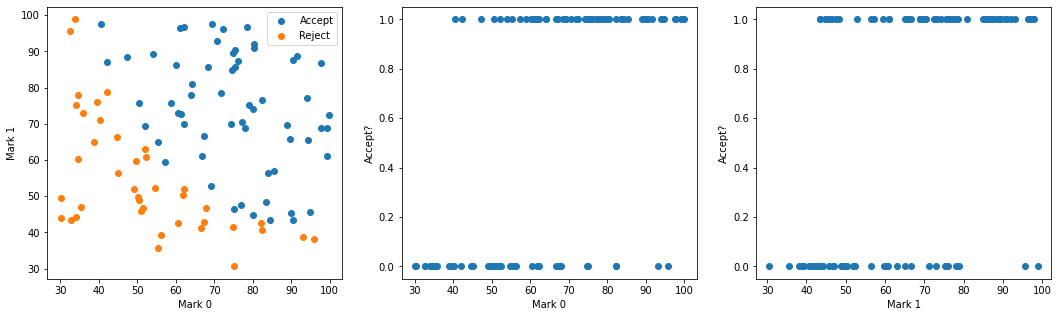

In [12]:
def plot_data(X,y):
    X_admitted = X[y==1,:]
    X_rejected = X[y==0,:]

    fig, ax = plt.subplots(1, 3, figsize=(18,5))

    ax[0].scatter(X_admitted[:,0],X_admitted[:,1])
    ax[0].scatter(X_rejected[:,0],X_rejected[:,1])
    ax[0].set_xlabel('Mark 0')
    ax[0].set_ylabel('Mark 1')
    ax[0].legend(('Accept','Reject'))

    ax[1].scatter(X[:,0], Y)
    ax[1].set_xlabel('Mark 0')
    ax[1].set_ylabel('Accept?')

    ax[2].scatter(X[:,1], Y)
    ax[2].set_xlabel('Mark 1')
    ax[2].set_ylabel('Accept?')  

plot_data(X,Y)

## 3.3 Model definition: Logistic Regression
Given the input data: $X_i=(x^0_i,x^1_i)$ for (Mark 0, Mark 1) and our 1-layer MLP model $\hat{Y}_i = \sigma(w_0x^0_i+w_1x^1_i+w_2)$, where $\sigma(x)=\dfrac{1}{1+e^{-x}}$. The optimization problem is defined as
- **Variables:** $\mathbf{w}=(w_0,w_1,w_2)$
- **Objective function**: We use the MSE loss function 

$g(\mathbf{w}) = MSE(\hat{Y}-Y) =\frac{1}{N}\sum_i (\hat{Y}_i - Y_i)^2= \frac{1}{N}\sum_i (\sigma(w_0x^0_i+w_1x^1_i+w_2) - Y_i)^2$
- **Constraints**: None.

In [3]:
def sigmoid(z):
    """function that computes the sigmoid transform of z"""
    f = 1 / (1 + np.exp(-z))
    return f

def compute_y_hat(x, w):
    """function that computes y_hat (aka probability that y=1)"""
    y_hat = sigmoid(w[0]*x[:,0] + w[1]*x[:,1] + w[2])
    return y_hat

def g(w, x=X, y=Y): # objective function
    """function that computes the MSE loss
    for parameters w, inputs x, and outcomes y"""
    y_hat = compute_y_hat(x, w)
    return ((y-y_hat)**2).mean()

## 3.4 Model optimization

Remember the chain rules in Pset 1 Problem 3.2. We'll derive all partial derivatives.

\begin{align}
\dfrac{\partial g(\mathbf{w})}{\partial w_0} &=\frac{1}{N}\sum_i\dfrac{\partial (\hat{Y}_i-Y_i)^2}{\partial w_0}\\
&=\frac{1}{N}\sum_i 2(\hat{Y}_i-Y_i)\dfrac{\partial \hat{Y}}{\partial w_0}\\
&=\frac{1}{N}\sum_i 2(\hat{Y}_i-Y_i)\dfrac{\partial \sigma(w_0x^0_i+w_1x^1_i+w_2)}{\partial w_0}\\
&=\frac{1}{N}\sum_i 2(\hat{Y}_i-Y_i) \{\hat{Y}_i(1-\hat{Y}_i)\}\dfrac{\partial (w_0x^0_i+w_1x^1_i+w_2)}{\partial w_0}\\
&=\frac{1}{N}\sum_i 2(\hat{Y}_i-Y_i) \{\hat{Y}_i(1-\hat{Y}_i)\}x^0_i
\end{align}


\begin{align}
\dfrac{\partial g(\mathbf{w})}{\partial w_1} &=\frac{1}{N}\sum_i 2(\hat{Y}_i-Y_i) \{\hat{Y}_i(1-\hat{Y}_i)\}\dfrac{\partial (w_0x^0_i+w_1x^1_i+w_2)}{\partial w_1}\\
&=\frac{1}{N}\sum_i 2(\hat{Y}_i-Y_i) \{\hat{Y}_i(1-\hat{Y}_i)\}x^1_i
\end{align}


\begin{align}
\dfrac{\partial g(\mathbf{w})}{\partial w_2} &=\frac{1}{N}\sum_i 2(\hat{Y}_i-Y_i) \{\hat{Y}_i(1-\hat{Y}_i)\}\dfrac{\partial (w_0x^0_i+w_1x^1_i+w_2)}{\partial w_2}\\
&=\frac{1}{N}\sum_i 2(\hat{Y}_i-Y_i) \{\hat{Y}_i(1-\hat{Y}_i)\}
\end{align}

Here we implement $\dfrac{\partial g(\mathbf{w})}{\partial w_i}$.

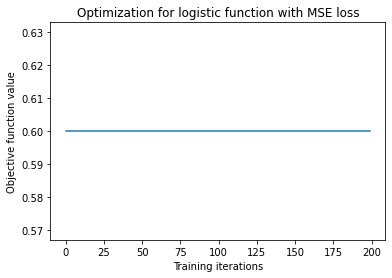

Initial w -> loss:  [1, -1, -131.8662721454401] 0.6
Optimized w -> loss:  [   1.           -1.         -131.86627215] 0.6


In [18]:
## gradient descent
def Dg(w, x=X, y=Y):
    """function that computes the MSE loss
    for parameters w, inputs x, and outcomes y"""
    # remember y_hat is a vector 
    y_hat = compute_y_hat(x, w)  

    #### Key Implementation
    grad_shared = 2*(y_hat-y)*y_hat*(1-y_hat)
    grad_w0 = (x[:,0]*grad_shared).mean()
    grad_w1 = (x[:,1]*grad_shared).mean()
    grad_w2 = grad_shared.mean()

    return np.array([grad_w0, grad_w1, grad_w2])

## gradient descent (same as 2.3 except passing in data (x,y))
def optimizer_grad_descent_data(x0, grad, x=X, y=Y, alpha = 0.1, num_step = 100, x_ran=None):
  history = np.zeros(num_step)
  for z in range(num_step):
    # gradient descent update    
    #print(x0, g(x0, x, y), grad(x0, x, y))
    
    x0 = x0 - alpha * grad(x0, x, y)

    if x_ran is not None:
      # clip the value
      x0 = np.clip(x0, x_ran[0], x_ran[1])
    history[z] = g(x0, x, y)
  return x0, history

###########################################
# it's important to set the initial value
# The heuristics here is to center the model prediction.
# One way to achive it is to set initial parameter values so that y_hat = (w_0, x= X.mean()) = 0.5
# thus \sigma(1*x_0 + 1*x_1 - (x_0.mean()+x_1.mean()))   is a natural choice
w0 = [1,-1,-X.mean(axis=0).sum()]
w1, history = optimizer_grad_descent_data(w0, Dg, alpha = 0.1, num_step = 200) 

ax=plt.subplot(1, 1, 1)
plt.plot(history)
ax.set_title('Optimization for logistic function with MSE loss')
ax.set_xlabel('Training iterations')
ax.set_ylabel('Objective function value')
plt.show()
print('Initial w -> loss: ', w0, g(w0))
print('Optimized w -> loss: ', w1, g(w1))

## 3.5 Model evaluation

For now, let's just check how well we can optimize the model on the whole dataset.



-----------
P.S. In practice for machine learning, people first divide the dataset into train, validation and test three splits. Then, the hyper-parameters of the model is chosen based on the model performance on the validation data split where the model is trained on the train data split. The test data is only touched once in the end.

In [19]:
def predict_class(w, x=X):
    """function that computes y_hat for all x and returns class labels"""    
    y_hat = compute_y_hat(x, w)
    y_predicted = y_hat > 0.5    
    return y_predicted

def compute_accuracy(w, x=X, y=Y):
    """function that compares predicted y to true y and returns accuracy"""
    y_predicted = predict_class(w, x)
    accuracy = np.sum(y_predicted == y)/len(y)
    return accuracy 

print('initial prediction accuray is: ',compute_accuracy(w0))
print('final prediction accuray is: ',compute_accuracy(w1))

initial prediction accuray is:  0.4
final prediction accuray is:  0.4


Let's plot the decision boundary $\sigma(w_0x^0_i+w_1x^1_i+w_2) = 0.5 \Leftrightarrow w_0x^0_i+w_1x^1_i+w_2 = 0$, which is a linear line.

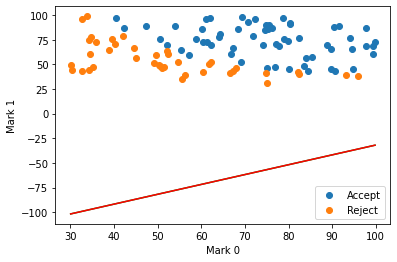

In [20]:
import numpy as np

def plot_logistic_regression(ww, x=X, y=Y):
  # plot original data
  X_admitted = x[y==1,:]
  X_rejected = x[y==0,:]
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.scatter(X_admitted[:,0],X_admitted[:,1])
  ax.scatter(X_rejected[:,0],X_rejected[:,1])
  ax.set_xlabel('Mark 0')
  ax.set_ylabel('Mark 1')
  ax.legend(('Accept','Reject'))

  # plot the decision boundary
  xx = np.linspace(x[:,0].min(), x[:,0].max(),100)
  yy = -ww[0]/ww[1]*xx-ww[2]/ww[1]
  ax.plot(xx,yy,'g-')
  #plt.show()
  return ax

ax = plot_logistic_regression(w1)

xx = np.linspace(X[:,0].min(), X[:,0].max(),100)
yy = -w0[0]/w0[1]*xx-w0[2]/w0[1]
ax.plot(xx,yy,'r-')
plt.show()

## 3.6 Side note: Data normalization

We know that a good initial value is critical for the gradient descent method. Above, we uses a simple hack to properly set the initial value. However, the optimization method is not good enough. For example, let's try another set of initial value for $w_0=(1,-1,0)$.



In [ ]:
w0 = [1,-1, 0]
w1, history = optimizer_grad_descent_data(w0, Dg, alpha = 0.1, num_step = 1000) 

ax=plt.subplot(1, 1, 1)
plt.plot(history)
ax.set_title('Optimization for logistic function with MSE loss')
ax.set_xlabel('Training iterations')
ax.set_ylabel('Objective function value')
plt.show()
print('Initial w -> loss: ', w0, g(w0))
print('Optimized w -> loss: ', w1, g(w1))
print('prediction accuray is: ',compute_accuracy(w1))

ax = plot_logistic_regression(w1)
xx = np.linspace(X[:,0].min(), X[:,0].max(),100)
yy = -w0[0]/w0[1]*xx-w0[2]/w0[1]
ax.plot(xx,yy,'r-')
plt.show()

The accuracy isn't great at all.. There are several solutions. One is to use a better optimizer to help the model get out of stuck (e.g., with momentum or stochastic gradient desent [more in week 5]). 

Another solution is to normalize the data, which is a common practice in data science. Such pre-processing method converts each input dimension to have mean 0 and standard deviation 1. (If you are intersted, a better way is called [data whitening](https://en.wikipedia.org/wiki/Whitening_transformation))

$X \rightarrow \dfrac{X- \mbox{mean}(X)}{\mbox{std}(X)}$

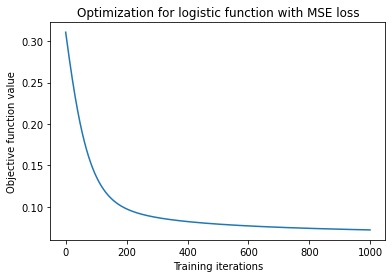

prediction accuray is:  0.89


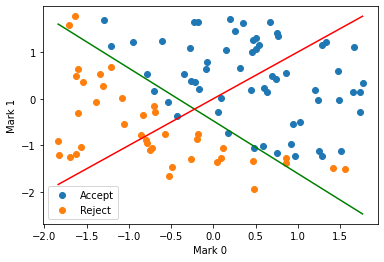

In [21]:
Xn = (X-X.mean(axis=0))/X.std(axis=0)
w0 = [1,-1,0]

w1, history = optimizer_grad_descent_data(w0, Dg, x=Xn, alpha = 0.1, num_step = 1000) 

ax=plt.subplot(1, 1, 1)
plt.plot(history)
ax.set_title('Optimization for logistic function with MSE loss')
ax.set_xlabel('Training iterations')
ax.set_ylabel('Objective function value')
plt.show()


print('prediction accuray is: ',compute_accuracy(w1, Xn))
ax = plot_logistic_regression(w1, Xn)

xx = np.linspace(Xn[:,0].min(), Xn[:,0].max(),100)
yy = -w0[0]/w0[1]*xx-w0[2]/w0[1]
ax.plot(xx,yy,'r-')
plt.show()